In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__


'3.1.0'

In [3]:
#Following code from https://towardsdatascience.com/financial-analytics-exploratory-data-analysis-of-stock-data-d98cbadf98b9

In [4]:
fb_df = pd.read_csv("fb_data.csv")
fb_df.head()
fb_df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1353,2012-11-07,20.85,20.95,20.37,20.4700,33396800.0,0.0,1.0,20.85,20.95,20.37,20.4700,33396800.0
1354,2012-11-06,21.24,21.37,20.99,21.1712,29062700.0,0.0,1.0,21.24,21.37,20.99,21.1712,29062700.0
1355,2012-11-05,21.10,21.48,20.92,21.2500,31806700.0,0.0,1.0,21.10,21.48,20.92,21.2500,31806700.0
1356,2012-11-02,21.26,21.69,21.07,21.1800,38344400.0,0.0,1.0,21.26,21.69,21.07,21.1800,38344400.0
1357,2012-11-01,21.08,21.44,21.01,21.2100,37713900.0,0.0,1.0,21.08,21.44,21.01,21.2100,37713900.0


In [68]:
fb_df.info()
fb_df['Date'] = pd.to_datetime(fb_df['Date'])
fb_df.index = fb_df['Date']
fb_df = fb_df.sort_index()
fb_df.info()
fb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1358 entries, 0 to 1357
Data columns (total 13 columns):
Date           1358 non-null object
Open           1358 non-null float64
High           1358 non-null float64
Low            1358 non-null float64
Close          1358 non-null float64
Volume         1358 non-null float64
Ex-Dividend    1358 non-null float64
Split Ratio    1358 non-null float64
Adj. Open      1358 non-null float64
Adj. High      1358 non-null float64
Adj. Low       1358 non-null float64
Adj. Close     1358 non-null float64
Adj. Volume    1358 non-null float64
dtypes: float64(12), object(1)
memory usage: 138.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1358 entries, 2012-11-01 to 2018-03-27
Data columns (total 13 columns):
Date           1358 non-null datetime64[ns]
Open           1358 non-null float64
High           1358 non-null float64
Low            1358 non-null float64
Close          1358 non-null float64
Volume         1358 non-null float64
Ex-D

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
2012-11-01,2012-11-01,21.08,21.44,21.01,21.2100,37713900.0,0.0,1.0,21.08,21.44,21.01,21.2100,37713900.0
2012-11-02,2012-11-02,21.26,21.69,21.07,21.1800,38344400.0,0.0,1.0,21.26,21.69,21.07,21.1800,38344400.0
2012-11-05,2012-11-05,21.10,21.48,20.92,21.2500,31806700.0,0.0,1.0,21.10,21.48,20.92,21.2500,31806700.0
2012-11-06,2012-11-06,21.24,21.37,20.99,21.1712,29062700.0,0.0,1.0,21.24,21.37,20.99,21.1712,29062700.0
2012-11-07,2012-11-07,20.85,20.95,20.37,20.4700,33396800.0,0.0,1.0,20.85,20.95,20.37,20.4700,33396800.0


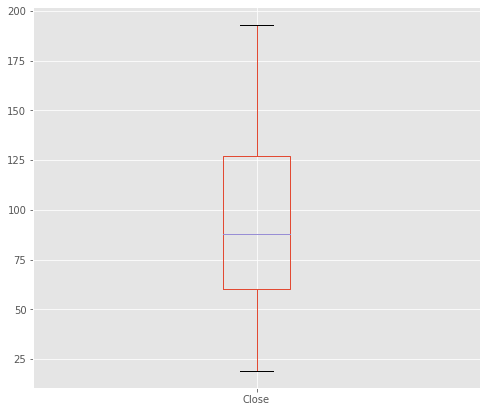

In [69]:
fb_boxplot = fb_df.boxplot(column='Close')

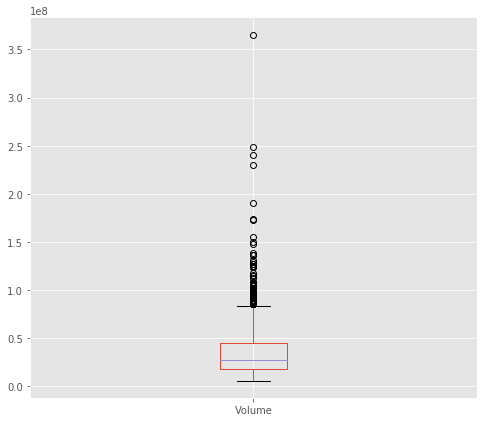

In [70]:
fb_boxplot = fb_df.boxplot(column='Volume')

(array([734503., 734869., 735234., 735599., 735964., 736330., 736695.]),
 <a list of 7 Text xticklabel objects>)

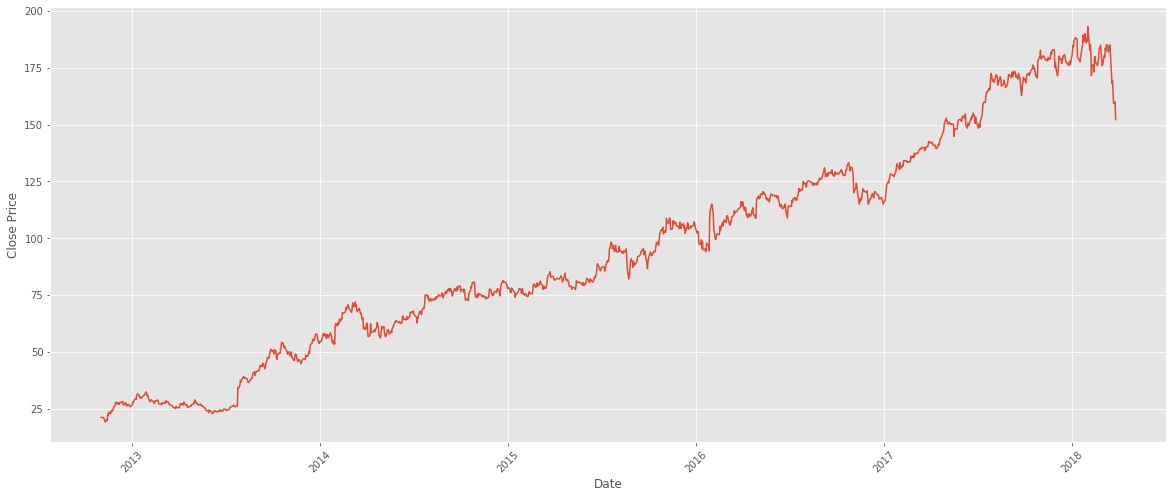

In [71]:
plt.figure(figsize=(20,8))
plt.plot('Date','Close', data=fb_df)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [72]:
#Creating a daily lag column 
fb_df['Daily Lag'] = fb_df['Close'].shift(1)
fb_df.head()


,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag
Date,,,,,,,,,,,,,,
2012-11-01,2012-11-01,21.08,21.44,21.01,21.2100,37713900.0,0.0,1.0,21.08,21.44,21.01,21.2100,37713900.0,NaN
2012-11-02,2012-11-02,21.26,21.69,21.07,21.1800,38344400.0,0.0,1.0,21.26,21.69,21.07,21.1800,38344400.0,21.2100
2012-11-05,2012-11-05,21.10,21.48,20.92,21.2500,31806700.0,0.0,1.0,21.10,21.48,20.92,21.2500,31806700.0,21.1800
2012-11-06,2012-11-06,21.24,21.37,20.99,21.1712,29062700.0,0.0,1.0,21.24,21.37,20.99,21.1712,29062700.0,21.2500
2012-11-07,2012-11-07,20.85,20.95,20.37,20.4700,33396800.0,0.0,1.0,20.85,20.95,20.37,20.4700,33396800.0,21.1712


In [73]:
#Create the daily returns columns
fb_df['Daily Returns'] = (fb_df['Daily Lag']/fb_df['Close']) - 1
fb_df.head()
fb_df.tail()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,Daily Lag,Daily Returns
Date,,,,,,,,,,,,,,,
2018-03-21,2018-03-21,164.80,173.40,163.30,169.39,105350867.0,0.0,1.0,164.80,173.40,163.30,169.39,105350867.0,168.15,-0.007320
2018-03-22,2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0,169.39,0.027291
2018-03-23,2018-03-23,165.44,167.10,159.02,159.39,52306891.0,0.0,1.0,165.44,167.10,159.02,159.39,52306891.0,164.89,0.034507
2018-03-26,2018-03-26,160.82,161.10,149.02,160.06,125438294.0,0.0,1.0,160.82,161.10,149.02,160.06,125438294.0,159.39,-0.004186
2018-03-27,2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0,160.06,0.051712


mean = -0.0012454931201177912
Std deviation = 0.020053384104518412


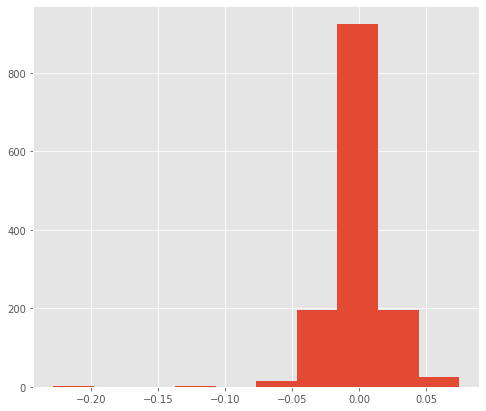

In [74]:
mean = fb_df['Daily Returns'].mean()
std = fb_df['Daily Returns'].std()
print('mean =',mean)
print('Std deviation =',std)
fb_df['Daily Returns'].hist()

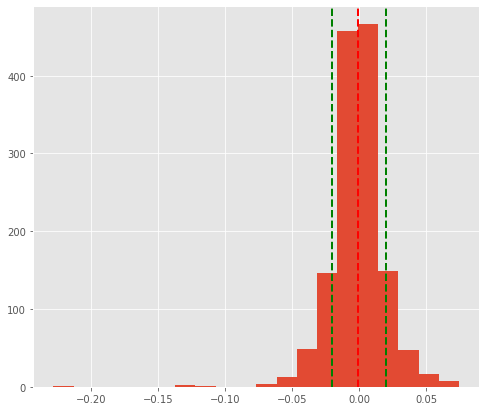

In [75]:
fb_df['Daily Returns'].hist(bins=20)
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2)
#to plot the std line we plot both the positive and negative values 
plt.axvline(std,color='g',linestyle='dashed',linewidth=2)
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)

In [76]:
fb_df['Daily Returns'].kurtosis()
#The kurtosis result shows that the data is highly skewed i.e. > 1

15.630518251648596

In [77]:
#From https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
#Coding the rolling mean 
close_px = fb_df['Close']
print(type(close_px))
mavg = close_px.rolling(window=10).mean()
print(close_px)
print(mavg)

<class 'pandas.core.series.Series'>
Date
2012-11-01     21.2100
2012-11-02     21.1800
2012-11-05     21.2500
2012-11-06     21.1712
2012-11-07     20.4700
2012-11-08     19.9900
2012-11-09     19.2100
2012-11-12     20.0700
2012-11-13     19.8600
2012-11-14     22.3600
2012-11-15     22.1700
2012-11-16     23.5607
2012-11-19     22.9200
2012-11-20     23.1000
2012-11-21     24.3200
2012-11-23     23.9980
2012-11-26     25.9400
2012-11-27     26.1500
2012-11-28     26.3600
2012-11-29     27.3200
2012-11-30     28.0000
2012-12-03     27.0400
2012-12-04     27.4600
2012-12-05     27.7100
2012-12-06     26.9700
2012-12-07     27.4850
2012-12-10     27.8400
2012-12-11     27.9800
2012-12-12     27.5801
2012-12-13     28.2400
                ...   
2018-02-13    173.1500
2018-02-14    179.5200
2018-02-15    179.9600
2018-02-16    177.3600
2018-02-20    176.0100
2018-02-21    177.9100
2018-02-22    178.9900
2018-02-23    183.2900
2018-02-26    184.9300
2018-02-27    181.4600
2018-02-28    17

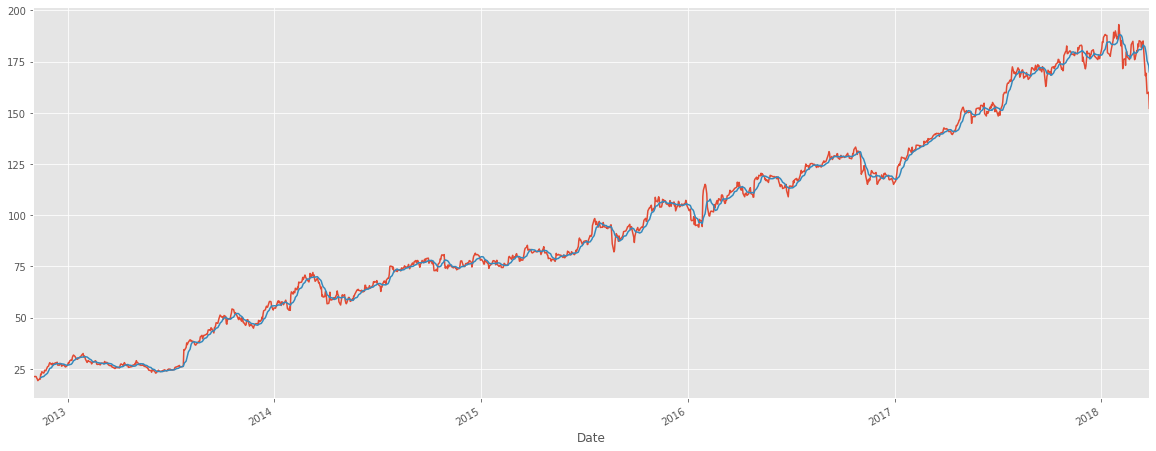

In [78]:
# Adjusting the style of matplotlib
style.use('ggplot')
plt.figure(figsize=(20,8))
close_px.plot(label='FB')
mavg.plot(label='mavg')

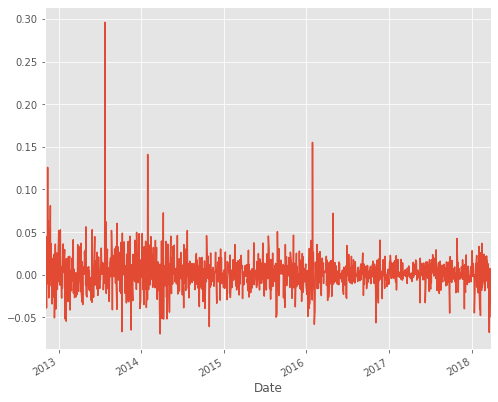

In [79]:
#Calculating return deviation
returns = close_px / close_px.shift(1) - 1
returns.plot(label='return')